# Нейронная сеть

In [138]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from keras.utils import to_categorical
from keras import models
from keras import layers

In [139]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_diff(y):
    return y*(1 - y)


In [140]:
class NeuralNetwork:
    def __init__(self, x, y): # m - объём датасета
        self.input      = x #nxm
        self.y          = y #1xm
        self.diam_s     = 3 #k
        self.weights1   = np.random.rand(self.diam_s, self.input.shape[0]) # kxn
        # print(self.weights1)
        self.weights2   = np.random.rand(1, self.diam_s) # 1xk
        self.output     = np.zeros(self.y.shape) #1xm
        self.alpha      = 1
        self.bias       = np.random.rand(self.diam_s, 1)
        self.b          = np.random.rand()

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.weights1, self.input) + self.bias) #kxm
        self.output = np.dot(self.weights2, self.layer1) + self.b # 1xm

    def backprop(self):
        d_weights2 = 2*np.dot((self.y - self.output),self.layer1.T) # 1xk
        d_weights1 = 2*self.weights2.T*np.dot((self.y - self.output)*sigmoid_diff(self.layer1),self.input.T )
        d_bias     = 2*self.weights2.T*np.dot(sigmoid_diff(self.layer1), (self.y - self.output).T)
        d_b        = 2*(self.y - self.output).sum()


        self.weights1 += self.alpha * d_weights1/self.input.shape[1]
        self.weights2 += self.alpha * d_weights2/self.input.shape[1]
        self.bias     += self.alpha * d_bias/self.input.shape[1]
        self.b        += self.alpha * d_b/self.input.shape[1]

    def test(self, t):
        return np.dot(self.weights2, sigmoid(np.dot(self.weights1, t) + self.bias)) + self.b

$$U = U_{1,k} = \left( u_1,\ u_2,\dots,u_k\right)  = \left( \dots u_i\dots\right)_{1\times k} $$

$$W = W_{k,n} = 
\left(
  \begin{array}{ccc}
  w_{11} & \cdots & w_{1n} \\
  w_{21} & \cdots & w_{2n} \\
  \cdots & \cdots & \cdots \\
  w_{k1} & \cdots & w_{kn} \\
  \end{array}
  \right) = 
\left(
  \begin{array}{ccc}
  \cdots & \cdots & \cdots \\
  \cdots & w_{ij} & \cdots \\
  \cdots & \cdots & \cdots \\
  \end{array}
  \right)_{k\times n}
   $$

$$X = X_{n,m} = 
\left(
  \begin{array}{ccc}
  x_{11} & \cdots & x_{1n} \\
  x_{21} & \cdots & x_{2n} \\
  \cdots & \cdots & \cdots \\
  x_{n1} & \cdots & x_{nm} \\
  \end{array}
  \right) = 
\left(
  \begin{array}{ccc}
  \cdots & \cdots & \cdots \\
  \cdots & x_{ij} & \cdots \\
  \cdots & \cdots & \cdots \\
  \end{array}
  \right)_{n\times m}
   $$

$$ X_{i} = 
\left(
  \begin{array}{c}
   x_{1i} \\
   x_{2i} \\
   \cdots \\
   x_{ni} \\
  \end{array}
  \right) 
   $$

 $$ B = B_{k,1} = 
\left(
  \begin{array}{c}
   b_{1} \\
   b_{2} \\
   \cdots \\
   b_{k} \\
  \end{array}
  \right) 
   $$ 


In [141]:
A = np.array([[1,2,1],[0,-1,3]])
B = np.array([[1,2],[1,0],[-1,3]])

In [142]:
print(A)
print(B)

[[ 1  2  1]
 [ 0 -1  3]]
[[ 1  2]
 [ 1  0]
 [-1  3]]


In [143]:
np.dot(A,B)

array([[ 2,  5],
       [-4,  9]])

In [144]:
np.dot(B,A)

array([[ 1,  0,  7],
       [ 1,  2,  1],
       [-1, -5,  8]])

In [145]:
C = np.array([[1,1,1],[2,2,2]])

In [146]:
A*C

array([[ 1,  2,  1],
       [ 0, -2,  6]])

In [147]:
D = np.array([[1,2,3]])

In [148]:
A*D

array([[ 1,  4,  3],
       [ 0, -2,  9]])

In [149]:
A*np.array([[4],[7]])

array([[ 4,  8,  4],
       [ 0, -7, 21]])

In [150]:
A + 5

array([[6, 7, 6],
       [5, 4, 8]])

$$NN(X_{n,m}) = U_{1,k}\cdot \phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) + b;\ 1,m $$

$$L = (Y_{1,m} - NN(X_{n,m}))^2.sum() = (Y_{1,m} - NN(X_{n,m}))^2\cdot E_{1,m},\ \ \  E_{1,m}=(1,1,\dots,1)^{\tau}_{1,m}$$

$$\phi(W\cdot X+B)=\left(
  \begin{array}{ccc}
  \dots & \dots & \dots \\
  \dots & \phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) & \dots \\
  \dots & \dots & \dots \\
  \end{array}
  \right)
   $$

$$U\cdot\phi(W\cdot X+B)=\left(
  \begin{array}{ccc}
  \dots & \sum\limits_{i=1}^{k}u_i\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) & \dots \\
  \end{array}
  \right)
   $$

$$NN(X)=U\cdot\phi(W\cdot X+B) + b=\left(
  \begin{array}{ccc}
  \dots & \sum\limits_{i=1}^{k}u_i\phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right) +b  & \dots \\
  \end{array}
  \right)
   $$



$$L(X) = \sum\limits_{p=1}^{m}(y_p-NN(X_p))^2 $$

$$ \dfrac{\partial L}{\partial u_{i}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))  \phi\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right)$$


$$ \dfrac{\partial L}{\partial w_{ij}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))u_i  \phi'\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right)x_{jp}$$

$$ \dfrac{\partial L}{\partial b_{i}}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))u_i  \phi'\left(\sum\limits_{l=1}^{n}w_{il}x_{lp} + b_{i}\right)$$

$$ \dfrac{\partial L}{\partial b}= -2 \sum\limits_{p=1}^{m}(y_p-NN(X_p))$$

$$ \dfrac{\partial L}{\partial U_{1,k}}= -2 (Y_{1,m} - NN(X_{n,m})) \cdot  \phi(W_{k,n}\cdot X_{n,m} + B_{k,1}) ^{\tau}$$

$$ \dfrac{\partial L}{\partial W_{k,n}}=  -2U_{1,k}^{\tau} (((Y_{1,m} - NN(X_{n,m}))\phi'(W_{k,n}\cdot X_{n,m} + B_{k,1}))\cdot X_{n,m}^{\tau})$$

$$ \dfrac{\partial L}{\partial B_{k,1}}=  -2U_{1,k}^{\tau} ((\phi'(W_{k,n}\cdot X_{n,m} + B_{k,1}))\cdot (Y_{1,m} - NN(X_{n,m}))^{\tau})$$

$$ \dfrac{\partial L}{\partial b}=  -2 (Y_{1,m} - NN(X_{n,m}))$$


In [151]:
def f(x):
    return x**2

X = np.array([np.arange(-1, 1.1, 0.1)])
print(X.shape[0])
# print(X)
Y = f(X)
print(Y)
#Y += 0.1*(np.random.random(Y.shape) - 0.5)
z = NeuralNetwork(X,Y)
z.input.shape

1
[[1.00000000e+00 8.10000000e-01 6.40000000e-01 4.90000000e-01
  3.60000000e-01 2.50000000e-01 1.60000000e-01 9.00000000e-02
  4.00000000e-02 1.00000000e-02 4.93038066e-32 1.00000000e-02
  4.00000000e-02 9.00000000e-02 1.60000000e-01 2.50000000e-01
  3.60000000e-01 4.90000000e-01 6.40000000e-01 8.10000000e-01
  1.00000000e+00]]


(1, 21)

In [152]:
z.alpha /= 100

In [153]:
z.alpha

0.01

In [154]:
for i in np.arange(100000):
    z.feedforward()
    z.backprop()

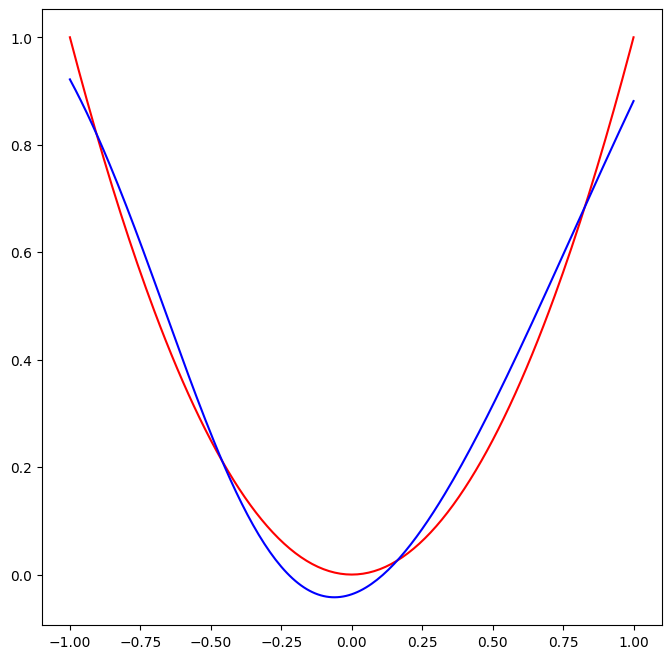

In [155]:
plt.figure(figsize=(8, 8))
plt.rcParams.update({'figure.figsize': (5, 5)})
X_n = np.arange(-1, 1.01, 0.01)
F = f(X_n)
#print(X[0],F)
Y_n = z.test(np.array([X_n]))
#print(X)
#print(z.test(X))

#print(Y.reshape((21,1)))
#Y = [z.test(x)[0][0] for x in X]
plt.plot(X_n,F,color='r')
plt.plot(X_n.ravel(),Y_n.ravel(),color='b')
#plt.scatter(X,Y)
#print(X,Y_n)

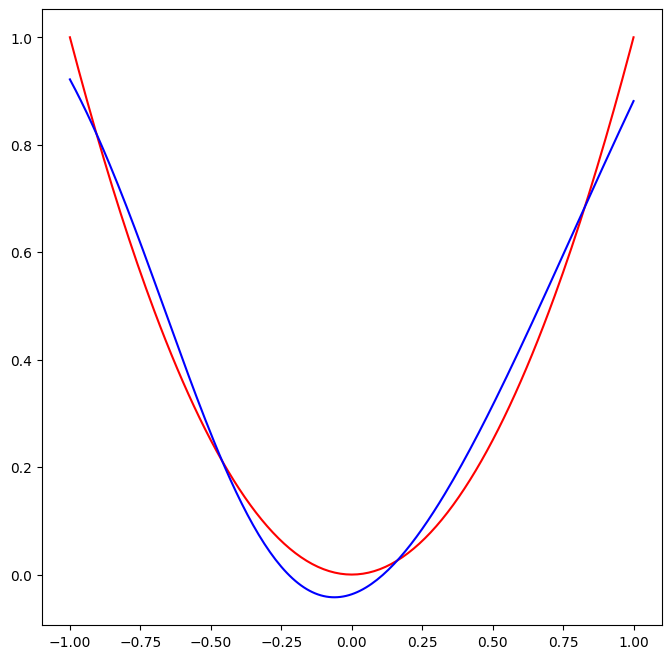

In [156]:
plt.figure(figsize=(8, 8))
plt.rcParams.update({'figure.figsize': (5, 5)})
X_n = np.arange(-1, 1.01, 0.01)
F = f(X_n)
#print(X[0],F)
Y_n = z.test(np.array([X_n]))
#print(X)
#print(z.test(X))

#print(Y.reshape((21,1)))
#Y = [z.test(x)[0][0] for x in X]
plt.plot(X_n,F,color='r')
plt.plot(X_n.ravel(),Y_n.ravel(),color='b')
#plt.scatter(X,Y)
#print(X,Y_n)

In [157]:
def sn(x,y):
    return (np.sin(y/6)/(1 + x**2/10) + 1)/2

In [158]:
dim_x = 100
#XY = np.random.uniform(-20, 20, 2*dim_x)
#XY.shape = (2,dim_x)
#X1 , Y1 = XY
X = np.arange(-20, 20, 1)
Y = np.arange(-20, 20, 1)
X, Y = np.meshgrid(X, Y)
X1, Y1 = X.ravel(), Y.ravel()
Z1 = (np.sin(Y1/6)/(1 + X1**2/10) + 1)/2

In [159]:
Xd = np.array([X1,Y1])
Xd.shape

(2, 1600)

In [160]:
Zd = np.array([list(Z1)])
Zd.shape

(1, 1600)

In [161]:
z = NeuralNetwork(Xd,Zd)

In [162]:
z.diam_s = 10

In [163]:
z.alpha /= 100

In [164]:
for i in range(10000):
    z.feedforward()
    z.backprop()

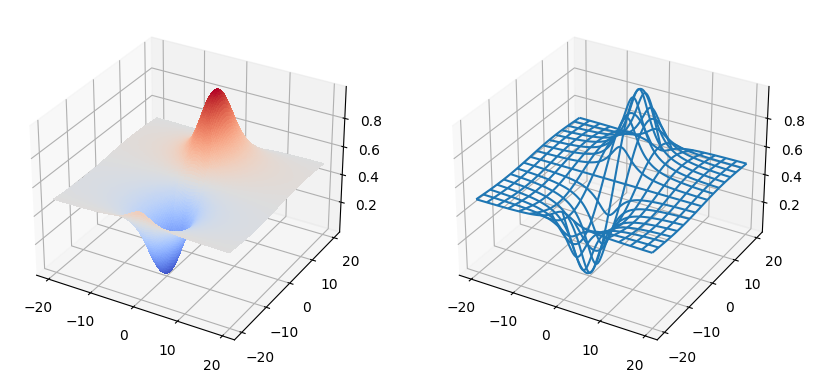

In [165]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (np.sin(Y/6)/(1 + X**2/10) + 1)/2
#X, Y, Z = get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

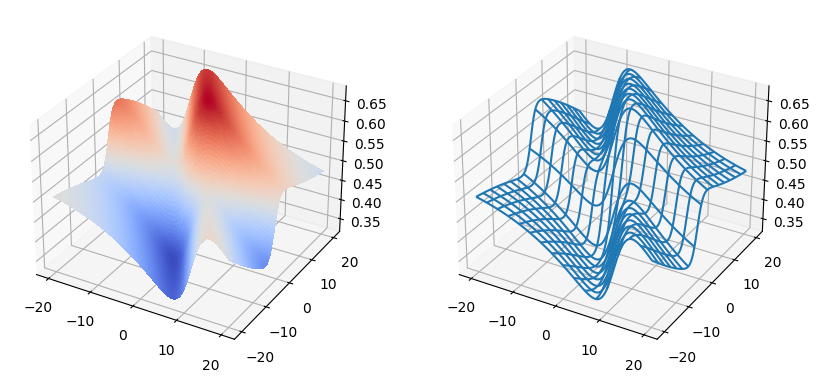

In [166]:
fig_2 = plt.figure(figsize=plt.figaspect(0.5))

ax_2 = fig_2.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20.25, 0.25)
Y = np.arange(-20, 20.25, 0.25)
X, Y = np.meshgrid(X, Y)

Z = z.test(np.array([X.ravel(),Y.ravel()])).reshape((161,161))

ax_2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax_2 = fig_2.add_subplot(1, 2, 2, projection='3d')

ax_2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)